Linear Regression - Cristel Irwin

#Code to import libraries.

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

Code to read dataset and rename it to "Training".

In [299]:
Y_Test = pd.read_csv("C:/Users/Sandy/Desktop/R CSV FILES/y_concrete_strength_test.csv")
Test = pd.read_csv("C:/Users/Sandy/Desktop/R CSV FILES/concrete_strength_test-1.csv")
Training= pd.read_csv("C:/Users/Sandy/Desktop/R CSV FILES/concrete_strength_train.csv")

Code to view first 5 lines of data set. Compressive Strength is the Target Value that we are trying to predict.

In [301]:
Training.head()

,Batch,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive Strength
0,0,148.0,175.0,0.0,171.0,2.0,1000.0,828.0,28,26.92
1,1,446.0,24.0,79.0,162.0,11.6,967.0,712.0,7,52.01
2,2,250.0,0.0,95.7,191.8,5.3,948.9,857.2,3,8.49
3,3,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,14,33.09
4,4,222.4,0.0,96.7,189.3,4.5,967.1,870.3,3,11.58


In [302]:
Test.columns

Index(['Batch', 'Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water',
       'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

Model 1 - Scikit

Code to create variables x and y.

In [331]:
x = Training[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']].values
y = Training['Compressive Strength'].values

Code to fit multi-linear regression model to training model.

In [330]:
model1 = linear_model.LinearRegression()

model1.fit(Training[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']], Training['Compressive Strength'])

print("Intercept\n",model1.intercept_)

print("\nCoefficients\n",model1.coef_)

Intercept
 -21.25735668479927

Coefficients
 [ 0.12137999  0.10703156  0.09031758 -0.17228536  0.21392213  0.01980393
  0.02003485  0.11651741]


Model 2 - StatsModel
This code was added to check the accuracy of model1.
Note that the output is the same as for Model 1.

In [332]:
import statsmodels.formula.api as smf

model2 = smf.ols(formula='y ~ x', data=Training).fit()

model2.params

Intercept   -21.257357
x[0]          0.121380
x[1]          0.107032
x[2]          0.090318
x[3]         -0.172285
x[4]          0.213922
x[5]          0.019804
x[6]          0.020035
x[7]          0.116517
dtype: float64

In [333]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     148.4
Date:                Sat, 23 Oct 2021   Prob (F-statistic):          1.60e-144
Time:                        18:06:21   Log-Likelihood:                -2619.7
No. Observations:                 700   AIC:                             5257.
Df Residuals:                     691   BIC:                             5298.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.2574     33.588     -0.633      0.527     -87.205      44.690
x[0]           0.1214      0.010     11.567      0.000       0.101       0.142
x[1]           0.1070      0.012      8.575      0.000       0.083       0.132
x[2]           0.0903      0.015      5.917      0.000       0.060       0.120
x[3]          -0.1723      0.051     -3.352      0.001      -0.273      -0.071
x[4]           0.2139      0.113      1.891      0.059      -0.008       0.436
x[5]           0.0198      0.012      1.656      0.098      -0.004       0.043
x[6]           0.0200      0.013      1.522      0.129      -0.006       0.046
x[7]           0.1165      0.007     17.820      0.000       0.104       0.129
==============================================================================
Omnibus:                        2.533   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                2.431
Skew:                          -0.143   Prob(JB):                        0.297
Kurtosis:                       3.039   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [336]:
y_pred = model1.predict(Training[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age']])


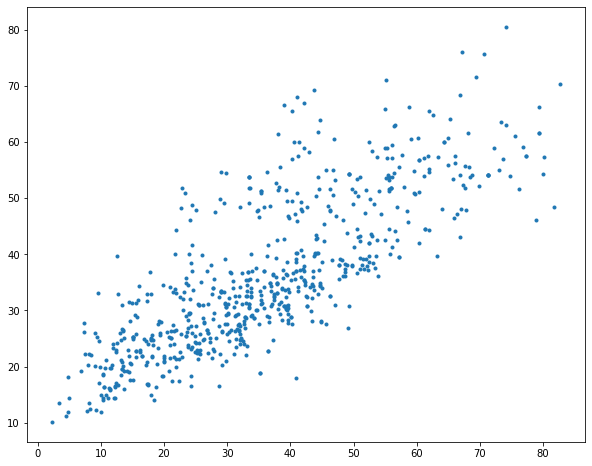

In [341]:
plt.figure(figsize=(10,8))
plt.plot(y, y_pred, '.')

In [345]:
model_Cement = linear_model.LinearRegression()

model_Cement.fit(Training[['Cement']], Training['Compressive Strength'])

print("Intercept\n",model_Cement.intercept_)

print("\nCoefficients\n",model_Cement.coef_)

Intercept
 13.41666903112738

Coefficients
 [0.08022367]


In [346]:
y_pred_Cement = model1.predict(Training[['Cement']])


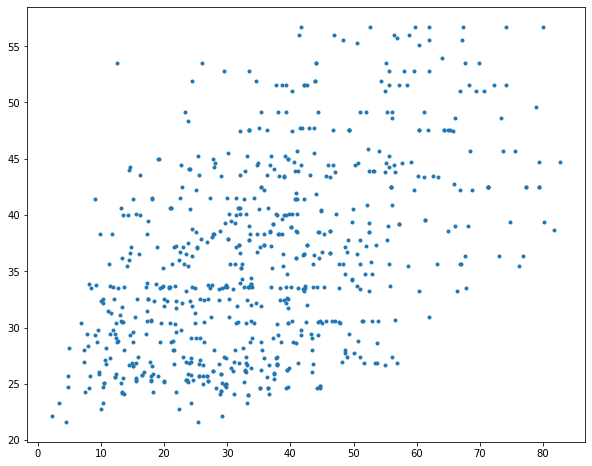

In [347]:
plt.figure(figsize=(10,8))
plt.plot(y, y_pred_Cement, '.')

In [348]:
model_BFS = linear_model.LinearRegression()

model_BFS.fit(Training[['Blast Furnace Slag']], Training['Compressive Strength'])

print("Intercept\n",model_BFS.intercept_)

print("\nCoefficients\n",model_BFS.coef_)

Intercept
 33.73227111420495

Coefficients
 [0.0308237]


In [349]:
y_pred_BFS = model1.predict(Training[['Blast Furnace Slag']])


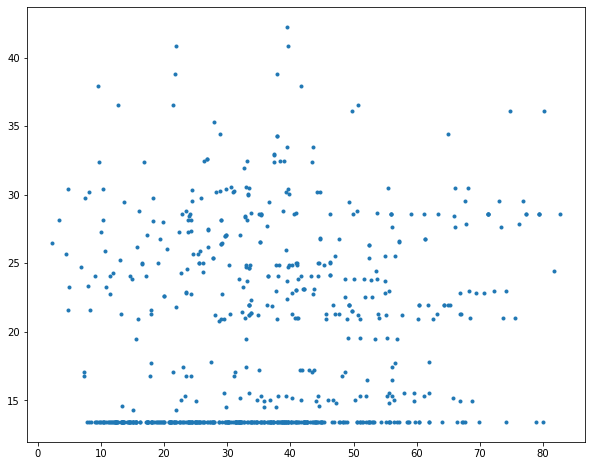

In [351]:
plt.figure(figsize=(10,8))
plt.plot(y, y_pred_BFS, '.')


In [353]:
model_Fly_Ash = linear_model.LinearRegression()

model_Fly_Ash.fit(Training[['Fly Ash']], Training['Compressive Strength'])

print("Intercept\n",model_Fly_Ash.intercept_)

print("\nCoefficients\n",model_Fly_Ash.coef_)

Intercept
 37.852633701524425

Coefficients
 [-0.03379291]


In [354]:
y_pred_Fly_Ash = model1.predict(Training[['Fly Ash']])


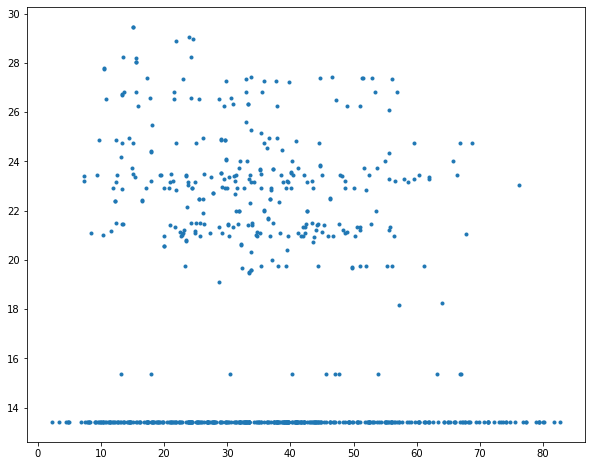

In [355]:
plt.figure(figsize=(10,8))
plt.plot(y, y_pred_Fly_Ash, '.')


In [356]:
model_Water = linear_model.LinearRegression()

model_Water.fit(Training[['Water']], Training['Compressive Strength'])

print("Intercept\n",model_Water.intercept_)

print("\nCoefficients\n",model_Water.coef_)

Intercept
 78.27470556124095

Coefficients
 [-0.233286]


In [357]:
y_pred_Water = model1.predict(Training[['Fly Ash']])


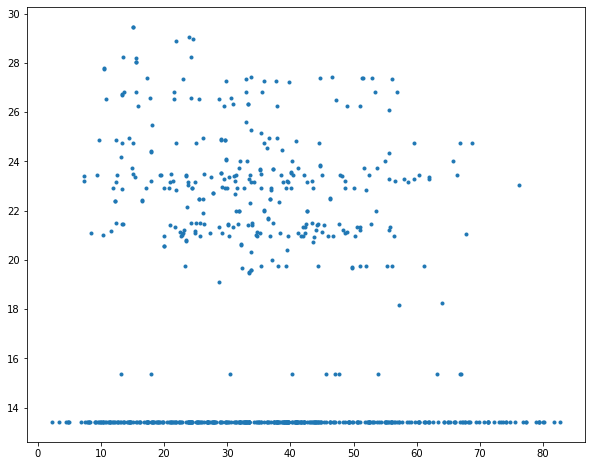

In [358]:
plt.figure(figsize=(10,8))
plt.plot(y, y_pred_Water, '.')


In [359]:
model_Superplasticizer = linear_model.LinearRegression()

model_Superplasticizer.fit(Training[['Superplasticizer']], Training['Compressive Strength'])

print("Intercept\n",model_Superplasticizer.intercept_)

print("\nCoefficients\n",model_Superplasticizer.coef_)

Intercept
 29.351987183589713

Coefficients
 [1.0292319]


In [362]:
y_pred_Superplasticizer = model1.predict(Training[['Superplasticizer']])


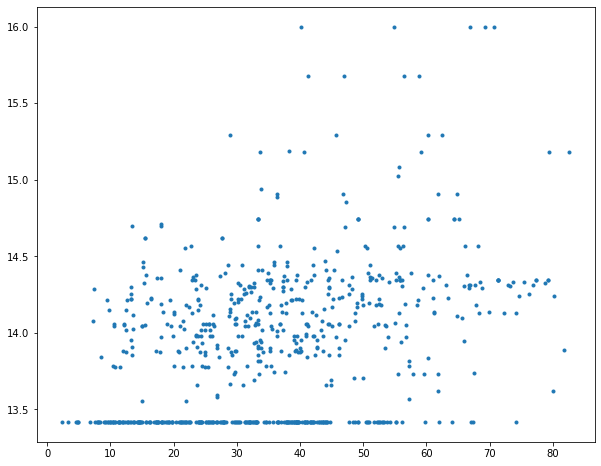

In [364]:
plt.figure(figsize=(10,8))
plt.plot(y, y_pred_Superplasticizer, '.')


In [366]:
model_CA = linear_model.LinearRegression()

model_CA.fit(Training[['Coarse Aggregate']], Training['Compressive Strength'])

print("Intercept\n",model_CA.intercept_)

print("\nCoefficients\n",model_CA.coef_)

Intercept
 74.71904596638964

Coefficients
 [-0.03981553]


In [367]:
y_pred_CA = model1.predict(Training[['Coarse Aggregate']])

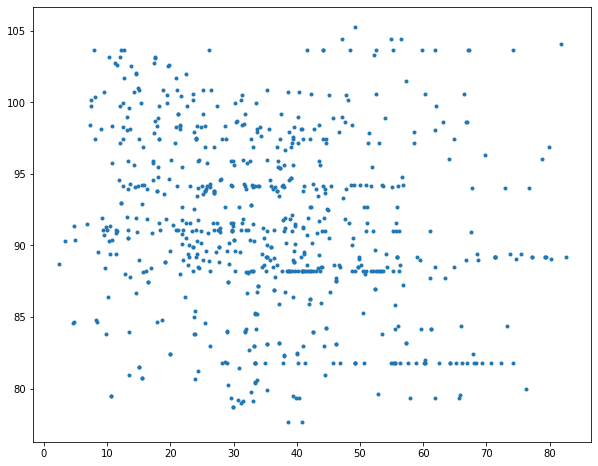

In [368]:
plt.figure(figsize=(10,8))
plt.plot(y, y_pred_CA, '.')

In [371]:
model_FA = linear_model.LinearRegression()

model_FA.fit(Training[['Fine Aggregate']], Training['Fine Aggregate'])

print("Intercept\n",model_FA.intercept_)

print("\nCoefficients\n",model_FA.coef_)

Intercept
 3.410605131648481e-13

Coefficients
 [1.]


In [374]:
y_pred_FA = model1.predict(Training[['Fine Aggregate']])

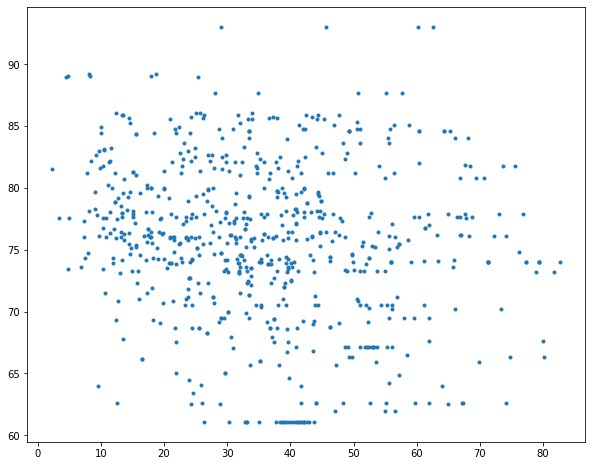

In [375]:
plt.figure(figsize=(10,8))
plt.plot(y, y_pred_FA, '.')

In [376]:
model_Age = linear_model.LinearRegression()

model_Age.fit(Training[['Age']], Training['Age'])

print("Intercept\n",model_Age.intercept_)

print("\nCoefficients\n",model_Age.coef_)

Intercept
 -7.105427357601002e-15

Coefficients
 [1.]


In [377]:
y_pred_Age = model1.predict(Training[['Age']])

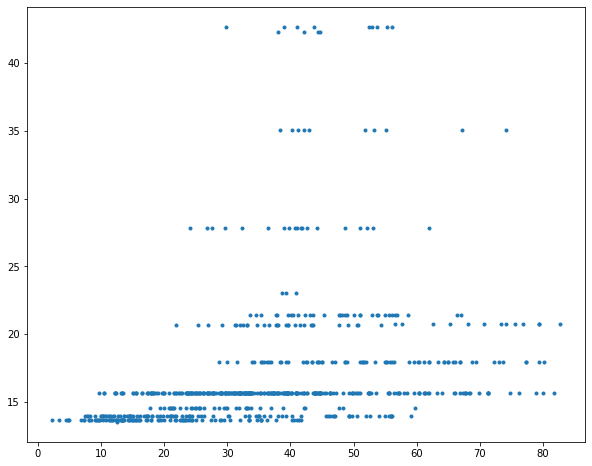

In [378]:
plt.figure(figsize=(10,8))
plt.plot(y, y_pred_Age, '.')